# Movie sequals: Is our culture really stuck?

### Background

I believe Twitter/X writer Paul Skallas, also known as Lindyman, coined the term "Stuck Culture." I could be wrong, but what I do know is that he explained the term and his thesis in his newsletter in late 2022. In short, the progress (or change) of our culture slowed down rapidly around the mid-2000s, with few new innovations since then that have actually changed how we live. Smartphones, YouTube, and Twitter are a few examples that shaped this post-2005 era, but they are now nearly 20 years old, and we are... stuck with them. The same apps and technologies dominate, and this is just one example of what Skallas refers to as "Stuck Culture." What summarizes this thesis well is Skallas' thought experiment: if you were to time travel back to 2007 wearing what you are now, nobody would notice that you are from the future. Okay, you get the idea.

I will not try to explain *why* this is happening. Instead, I will simply look at a logical proxy of "Stuck Culture": the number of movie remakes, sequels, and prequels made over different eras of our culture (something Skallas has also talked about). Because we all feel it, right? We browse the top movies at the cinema and see... *Gladiator 2*, *Jönssonligan 11?*, *Lion King 5?*, and *Interstellar Rerun 10th Anniversary* (a very good movie, by the way, but I can't shake the feeling that we are *very* stuck with 10-year-old reruns). Why is this a good proxy for "Stuck Culture"? Hollywood is obviously a profit-seeking machine and will throw money at anything that gets people to the theater—i.e., what is popular. It all boils down to the question: how does the popularity of sequels, prequels, and remakes today compare with other cultural eras?

### Data

I found all relevant data at IMDBs website, more specifically I scraped data from IMDBs advanced title search page. See the code page for more details on the excact code used. You can search for specific keywords in the advanced search so I scraped the number of hits on my search for every year 1924-2025 and every keyword (sequel, prequel and remake). This gives me the number of sequels, prequels and remakes made every year. I also scraped the number of results shown for every year, without any specific search conditions, essentially scraping the number of movies made every year. Last thing I did was made a search for every year, and for every keyword including no keyword, and scraped the titles of the first page shown (25 titles), that was sorted by *US top grossing*. I only took the first 25 titles because else I would have needed to interact with javascript to view 25 more movies (change page). The top 25 movies is enough data to make the desired analysis due to the nature of the data (fat tailed). I asked ChatGPT about it, it told me that the top 25 grossing movies of 2023 accounted for 49% of all revenue. This made me not needing to interact with javascript.

Below we see the scraped data in tables.

In [2]:
import pandas as pd

imdb_hits = pd.read_csv("imdb_hits_keywords.csv")

imdb_hits.head() # our scraped data

,Year,Keyword,Hits
0,1924,prequel,0
1,1924,sequel,4
2,1924,remake,12
3,1925,prequel,0
4,1925,sequel,5


I transfor the data by grouping by year and add a row for total number of prequels, sequels and remakes.

In [3]:
imdb_hits_p = imdb_hits.pivot_table(
    index="Year",        # Rows (index)
    columns="Keyword",   # Columns
    values="Hits",       # Values to aggregate
)

imdb_hits_p.reset_index(inplace=True)

imdb_hits_p["Total"] = imdb_hits_p[["prequel", "sequel", "remake"]].sum(axis=1)

imdb_hits_p.head() #cleaned df

Keyword,Year,prequel,remake,sequel,Total
0,1924,0.0,12.0,4.0,16.0
1,1925,0.0,21.0,5.0,26.0
2,1926,0.0,23.0,5.0,28.0
3,1927,0.0,16.0,7.0,23.0
4,1928,0.0,13.0,5.0,18.0


I dont need to transform the total hits per year (no keyword) data, as it's on a desired form already. I combine them in an appropraite way so we can see the share of sequels, prequels and remakes over the years as a part of the whole industry.

In [4]:
import pandas as pd

imdb_hits_years = pd.read_csv("imdb_hits_years.csv")

imdb_hits_merged = pd.merge(imdb_hits_years, imdb_hits_p, on="Year")

imdb_hits_merged["Share"] = imdb_hits_merged["Total"] / imdb_hits_merged["Hits"]
imdb_hits_merged.head()

,Year,Hits,prequel,remake,sequel,Total,Share
0,1924,1951,0.0,12.0,4.0,16.0,0.008201
1,1925,2122,0.0,21.0,5.0,26.0,0.012253
2,1926,2098,0.0,23.0,5.0,28.0,0.013346
3,1927,2222,0.0,16.0,7.0,23.0,0.010351
4,1928,2192,0.0,13.0,5.0,18.0,0.008212


Lastly, I need data to visiulaze how many of the most *popular* movies are sequels, prequels and remakes. As stated above, I did scarpe the relevant titles for all top 25 movies each year and looked for matches with the titles fetched from keyword search. 

In [10]:
import pandas as pd

top25_all = pd.read_csv("imdb_top_25_movies.csv")

top25_keywords = pd.read_csv("imdb_top_25_movies_with_keywords.csv")

# cleaning data by removing the number before the title

def clean_title(title):
    return title.split(".", 1)[-1].strip()

top25_all["Cleaned_Title"] = top25_all["Title"].apply(clean_title)
top25_keywords["Cleaned_Title"] = top25_keywords["Title"].apply(clean_title)


matches_dict = {}

for _, row1 in top25_all.iterrows():
    year1 = row1["Year"]
    title1 = row1["Cleaned_Title"]
    
    # Check for matches 
    match = top25_keywords[(top25_keywords["Year"] == year1) & (top25_keywords["Cleaned_Title"] == title1)]
    
    if not match.empty:
        if year1 not in matches_dict:
            matches_dict[year1] = []
        matches_dict[year1].append(title1)

# count the matching titles for each year and calculate the % of all tiles
title_counts = [
    {"Year": year, "Title_Count": len(titles), "Title_Percentage": (len(titles) / 25) * 100}
    for year, titles in matches_dict.items()
]

# Convert to a DataFrame
title_counts_df = pd.DataFrame(title_counts)
title_counts_df

,Year,Title_Count,Title_Percentage
0,1924,3,12.0
1,1925,1,4.0
2,1926,3,12.0
3,1928,1,4.0
4,1929,3,12.0
...,...,...,...
91,2020,7,28.0
92,2021,17,68.0
93,2022,12,48.0
94,2023,16,64.0


### Results

I can generate the followings plots from the data. In the first plot, showing the number of sequels etc. (not adjusted) made each year, we can eye ball three eras, the pre 1980s-era, the 1980s-2000s era and the post 2000s era. Pre 80s era the trend was flat, 80s-00s era was defined by a spike and then a decline and the post 00s era got a positive trend. That is in line with the thesis.

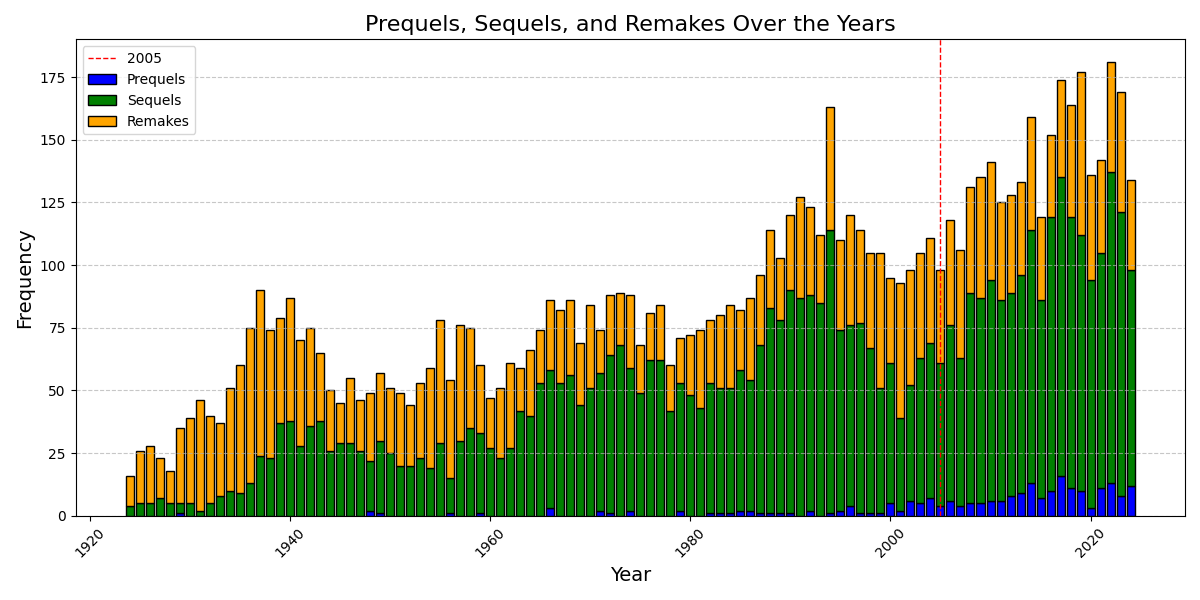

In [23]:
from IPython.display import Image, display

display(Image(filename="imdb_hits_keyword_plot.png"))

The second plot shows total movies released and the proportion of sequels etc., for each year. It looks like the share of sequels, prequels and remakes gets dwarfed during the post 00s era by the huge rise in movies released overall.

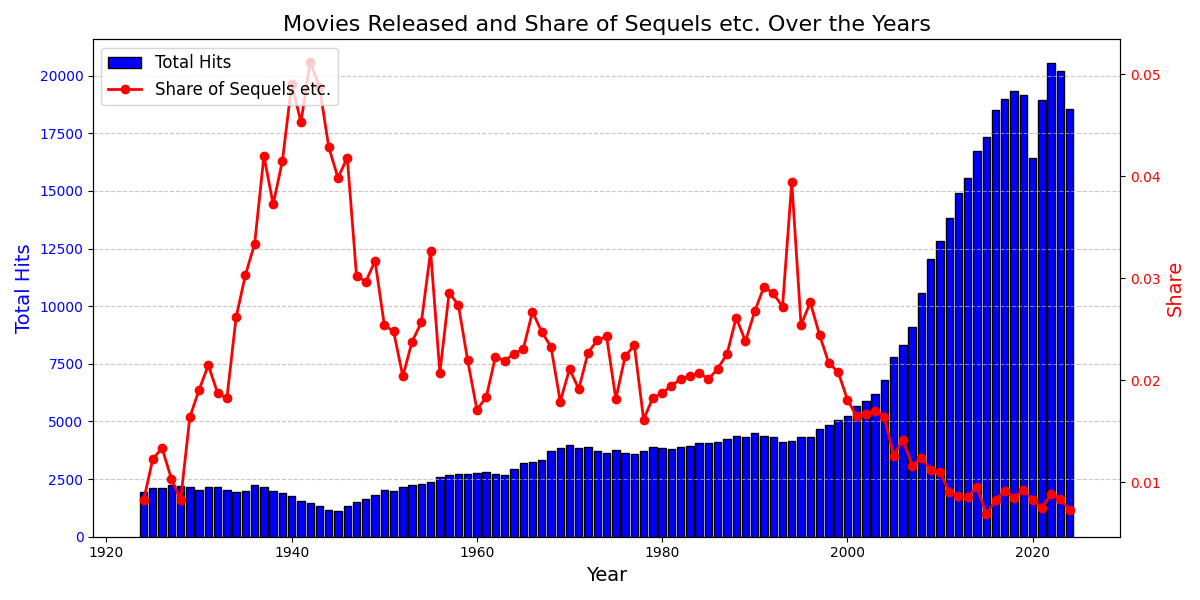

In [44]:
from IPython.display import Image, display

display(Image(filename="imdb_total_and_share_plot.png"))

In the last plot the data is adjusted for the total movies made by only looking at the top 25 movies by US box office for each year. This is logically the best data and visualization to answer the initial question about how *popular* sequels etc. are today. The era:s described in the first plot match kind of good, unsurprisingly. We can see a positive trend starting in the post 80s era, that accelerates through the post 00s era. To answer our question we can eye ball that sequels, prequels and remakes are significantly more popular today compared to 20 years ago, with the moving average showing an almost 100% increase. Stuck!

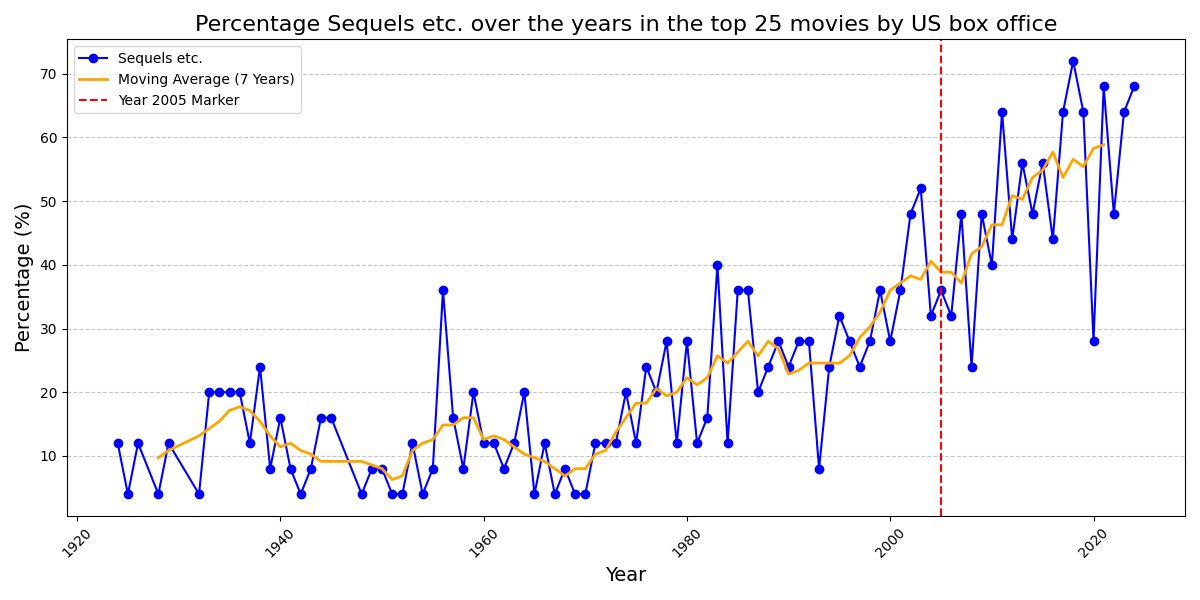

In [60]:
from IPython.display import Image, display

display(Image(filename="perc_sequels.png"))

### Links

 - Paul Skallas newsletter post about Stuck Culture: https://lindynewsletter.beehiiv.com/p/culture-stuck
 - IMDb title search: https://www.imdb.com/search/title/
